# All Data - NLP EDA

In [10]:
# Flag for if you are running this on the sample dataset
sample = False
# Modify this path as needed to run on your machine
sample_path = r'~\Box\STAT 222 Capstone\Intermediate Data\All_Data\all_data_fixed_quarter_dates_sample.csv'

In [11]:
# Packages
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist
import re
nltk.download('punkt')  # Download NLTK tokenizer
nltk.download('stopwords')  # Download NLTK stop words
from stattotex import *

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ijyli\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ijyli\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [12]:
# Output folder
output_folder = '../../../Output/All Data EDA/NLP EDA/'

In [13]:
# Time entire notebook
import time
start_time = time.time()

## Load Data

In [14]:
# Load in sample csv, or full parquet file
if sample:
    df = pd.read_csv(sample_path)
else:
    # Limit to items in the finalized dataset
    # list of files in '../../../Data/All_Data/All_Data_with_NLP_Features'
    import os
    file_list = [f for f in os.listdir(r'../../../Data/All_Data/All_Data_with_NLP_Features') if f.endswith('.parquet')]
    # read in all parquet files
    df = pd.concat([pd.read_parquet(r'../../../Data/All_Data/All_Data_with_NLP_Features/' + f) for f in file_list])
df

,ticker,fixed_quarter_date,earnings_call_date,Rating,rating_date,Next Rating,Next Rating Date,Previous Rating,Previous Rating Date,next_rating_date_or_end_of_data,...,Active,Passive,Ovrst,Undrst,PN,SW,AP,OU,TONE1,train_test_80_20
0,AAPL,2014-10-01,2014-07-22,AA,2014-05-27,AA,2015-02-18,AAA,2014-04-24,2015-02-18,...,495.0,186.0,364.0,131.0,5.518519,15.261905,2.661290,2.778626,3.188264,test
1,AAPL,2015-01-01,2014-10-20,AA,2014-05-27,AA,2015-02-18,AAA,2014-04-24,2015-02-18,...,656.0,199.0,465.0,152.0,5.348485,15.934783,3.296482,3.059211,3.681858,test
2,AAPL,2015-04-01,2015-01-27,AA,2015-02-18,AA,2015-05-28,AA,2014-05-27,2015-05-28,...,591.0,208.0,468.0,151.0,3.927711,8.113636,2.841346,3.099338,1.307366,train
3,AAPL,2015-07-01,2015-04-27,AA,2015-06-02,AA,2015-08-25,AA,2015-05-28,2015-08-25,...,565.0,214.0,415.0,135.0,5.250000,9.142857,2.640187,3.074074,2.025933,train
4,AAPL,2015-10-01,2015-07-21,AA,2015-08-25,AA,2016-05-20,AA,2015-06-02,2016-05-20,...,565.0,219.0,449.0,148.0,4.209877,10.442857,2.579909,3.033784,1.815531,test
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
562,MHO,2013-10-01,2013-07-25,CC,2013-05-07,CC,2013-11-06,CCC,2012-11-29,2013-11-06,...,295.0,122.0,180.0,82.0,7.153846,10.225000,2.418033,2.195122,2.140598,train
563,MHO,2014-01-01,2013-10-24,CC,2013-11-06,CCC,2014-07-31,CC,2013-05-07,2014-07-31,...,462.0,152.0,294.0,166.0,4.516129,6.771084,3.039474,1.771084,-0.029287,train
564,MHO,2014-04-01,2014-01-29,CC,2013-11-06,CCC,2014-07-31,CC,2013-05-07,2014-07-31,...,444.0,136.0,325.0,158.0,3.835821,7.078947,3.264706,2.056962,0.084888,test
565,MHO,2014-07-01,2014-04-24,CC,2013-11-06,CCC,2014-07-31,CC,2013-05-07,2014-07-31,...,329.0,127.0,194.0,103.0,3.703704,6.944444,2.590551,1.883495,-0.319794,train


## Print a transcript as it is represented in column 'transcript'

In [19]:
# Print one call string
print(df['transcript'][0])

0    Operator: Good day, everyone, and welcome to t...
0    Operator: Good morning, and welcome to the Fir...
0    Operator: Good afternoon, and welcome to the R...
0    Operator: Greetings, and welcome to the LKQ Co...
0    Operator: Good day, ladies and gentlemen, and ...
0    Operator: Good day, everyone, and welcome to t...
0    Operator: Good day, ladies and gentlemen, and ...
0    Operator: Good morning, and welcome to Carpent...
0    Operator: Good morning. I would like to welcom...
0    Operator: Ladies and gentlemen, thank you stan...
Name: transcript, dtype: object


## Transcript Length in Characters

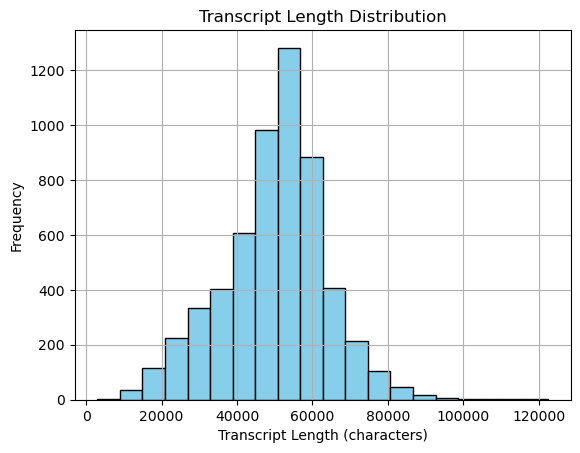

Average transcript length in characters: 49980.65 characters


In [20]:
# Text Length Distribution
df['char_length'] = df['transcript'].str.len()
#plt.figure(figsize=(8, 5))
plt.hist(df['char_length'], bins=20, color='skyblue', edgecolor='black')
plt.title('Transcript Length Distribution')
plt.xlabel('Transcript Length (characters)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

print(f"Average transcript length in characters: {df['char_length'].mean():.2f} characters")

## Tokenization

In [21]:
# Tokenize the text
df['transcript_tokens'] = df['transcript'].apply(word_tokenize)
# Words: strip punctuation and make lowercase
# Regex for not being solely punctuation
df['transcript_words'] = df['transcript_tokens'].apply(lambda x: [token for token in x if re.search(r'^[^\w]+$', token) == None])

## Number of Words

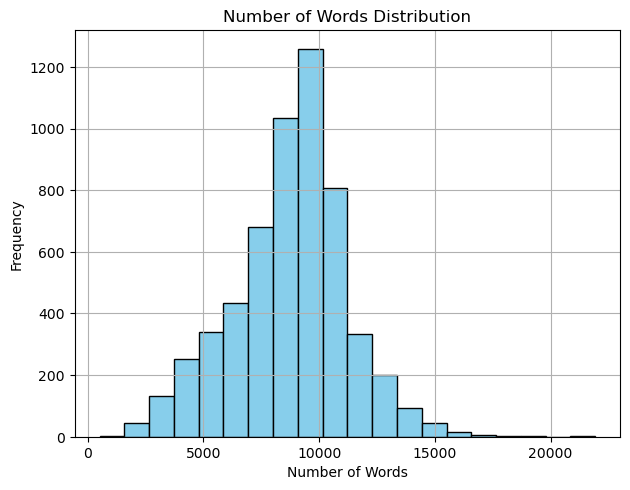

sum stats of call length
count     5670.000000
mean      8754.249383
std       2461.105263
min        515.000000
25%       7319.750000
50%       9006.000000
75%      10235.750000
max      21925.000000
Name: num_words, dtype: float64


In [22]:
# Count number of words
df['num_words'] = df['transcript_words'].apply(len)

# Figure
#plt.figure(figsize=(8, 5))
plt.hist(df['num_words'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.grid(True)
# tight layout
plt.tight_layout()
# Version with no title
plt.savefig(output_folder + 'all_data_num_words_distribution_no_title.png')
plt.title('Number of Words Distribution')
plt.savefig(output_folder + 'all_data_num_words_distribution.png')
plt.show()

print('sum stats of call length')
print(df['num_words'].describe())

# stattotex
mean_formatted = round(df['num_words'].mean(), 2)
mean_formatted = f'{mean_formatted:,}'
stattotex(mean_formatted, 'avgCallLength', output_folder + 'avg_call_length.tex')

C:\Users\ijyli\AppData\Local\Temp\ipykernel_22008\1248016500.py:27: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cl_means = df.groupby('Rating').agg({'num_words': 'mean'}).reset_index()


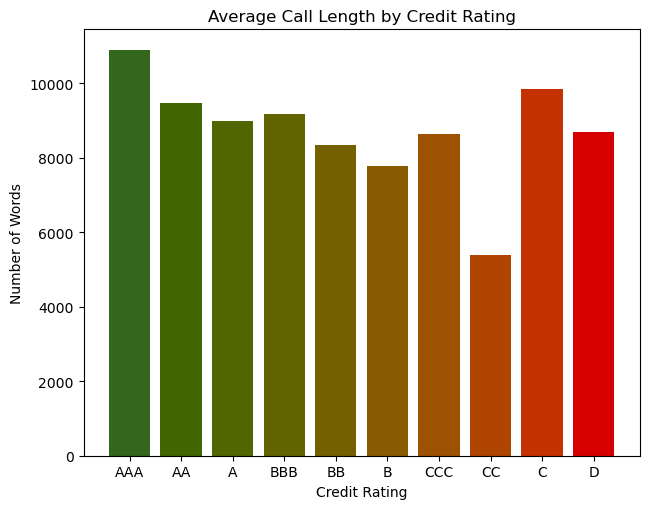

In [23]:
# Average call length by credit rating

# Colored with gradient and ordered

# Colors AAA through D
# Used https://colordesigner.io/gradient-generator#google_vignette
# Assign hex codes from green to red
#32671d
#416703
#516600
#626400
#756000
#885b00
#9c5200
#af4500
#c33200
#d60000
hex_code_mapper = {'AAA': '#32671d', 'AA': '#416703', 'A': '#516600', 'BBB': '#626400', 'BB': '#756000', 'B': '#885b00', 'CCC': '#9c5200', 'CC': '#af4500', 'C': '#c33200', 'D': '#d60000'}

# Ordering of bars - keys from hex_code_mapper
bar_order = ['AAA', 'AA', 'A', 'BBB', 'BB', 'B', 'CCC', 'CC', 'C', 'D']
# Assign values of Rating to this ordering
df['Rating'] = pd.Categorical(df['Rating'], categories=bar_order, ordered=True)
df = df.sort_values('Rating')

# Means of call length by credit rating
cl_means = df.groupby('Rating').agg({'num_words': 'mean'}).reset_index()

# Plot
#plt.figure(figsize=(10, 6))
plt.bar(cl_means['Rating'], cl_means['num_words'], color=cl_means['Rating'].map(hex_code_mapper))
# Tight layout
plt.tight_layout()
plt.xlabel('Credit Rating')
plt.ylabel('Number of Words')
# Version with no title
plt.savefig(output_folder + 'all_data_call_length_by_credit_rating_no_title.png')
plt.title('Average Call Length by Credit Rating')
plt.savefig(output_folder + 'all_data_call_length_by_credit_rating.png')
plt.show()

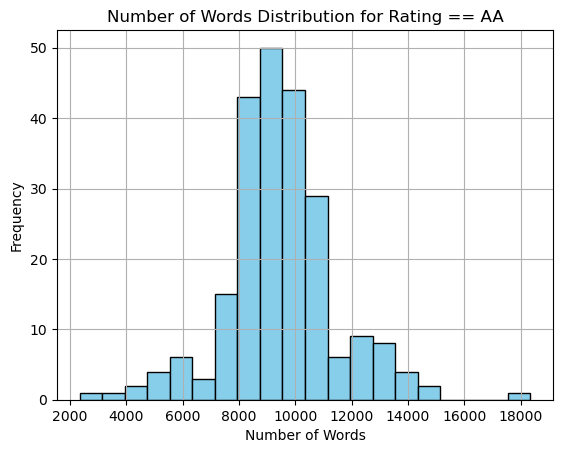

sum stats of call length where Rating == AA
count      228.000000
mean      9463.412281
std       1973.845790
min       2334.000000
25%       8483.750000
50%       9367.500000
75%      10378.000000
max      18346.000000
Name: num_words, dtype: float64


In [24]:
# Distribution of call length where Rating == 'AA'
#plt.figure(figsize=(8, 5))
plt.hist(df[df['Rating'] == 'AA']['num_words'], bins=20, color='skyblue', edgecolor='black')
plt.title('Number of Words Distribution for Rating == AA')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.grid(True)
plt.savefig(output_folder + 'all_data_num_words_distribution_AA.png')
plt.show()

print('sum stats of call length where Rating == AA')
print(df[df['Rating'] == 'AA']['num_words'].describe())

## Sentences

In [25]:
# Number of sentences
sentences = df['transcript'].apply(nltk.sent_tokenize)
df['num_sentences'] = sentences.apply(len)
print('average number of sentences:', df['num_sentences'].mean())

# Sentence length
print('average sentence length:', (df['num_words'] / df['num_sentences']).mean())

average number of sentences: 448.66119929453265
average sentence length: 19.73786738672727


## Word Frequency

Top 10 most common words:
quarter: 303103
year: 258460
think: 219283
million: 203469
business: 145925
growth: 140076
would: 131837
going: 128234
first: 114972
us: 113276


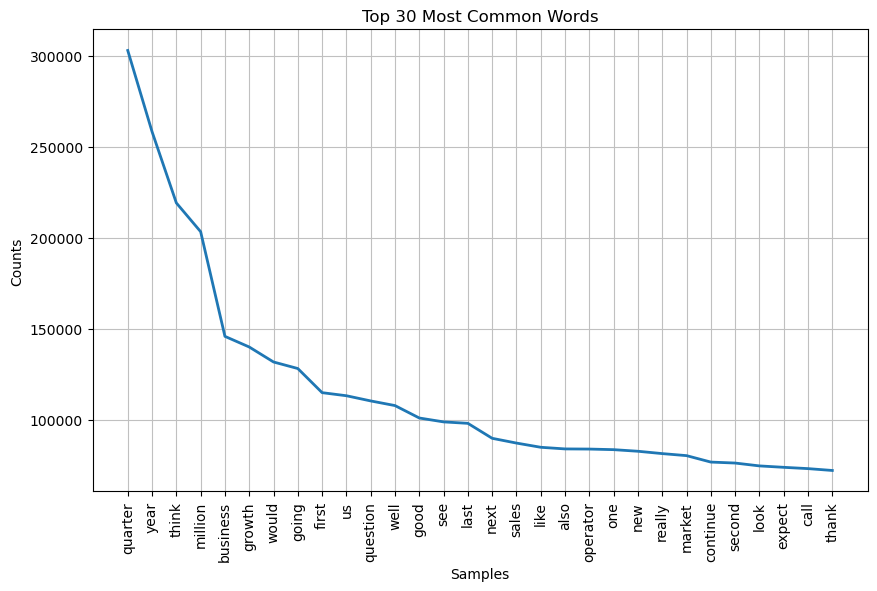

<Axes: title={'center': 'Top 30 Most Common Words'}, xlabel='Samples', ylabel='Counts'>

In [26]:
# Word Frequency Analysis
all_words = df['transcript_words'].explode().str.lower()

# Remove stop words and require isalpha
stop_words = set(stopwords.words('english'))
all_words = all_words[~all_words.isin(stop_words)]
all_words = all_words[all_words.str.isalpha()]

# Frequency distribution
fdist = FreqDist(all_words)
top_words = fdist.most_common(10)
print("Top 10 most common words:")
for word, freq in top_words:
    print(f"{word}: {freq}")

# Plot Word Frequency Distribution
plt.figure(figsize=(10, 6))
fdist.plot(30, title='Top 30 Most Common Words')

## Word Clouds for Different Ratings

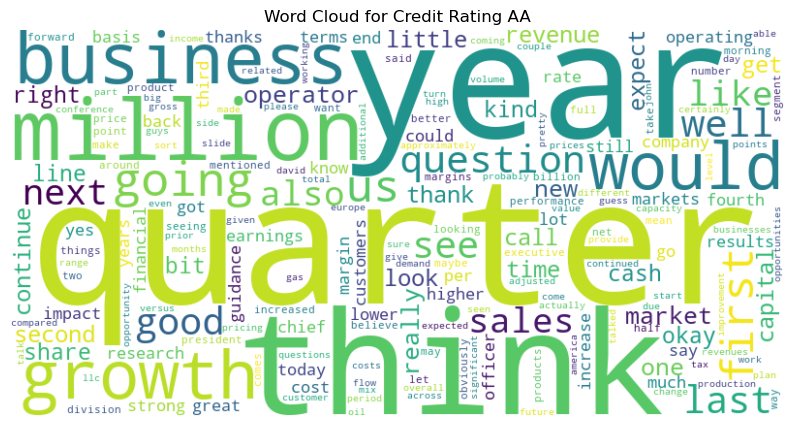

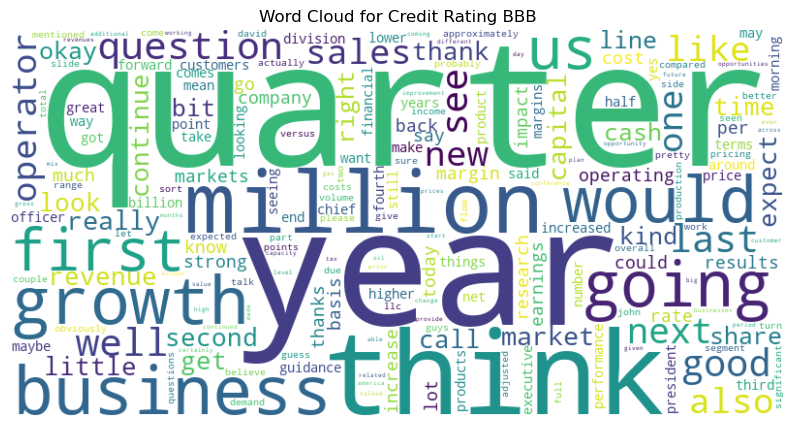

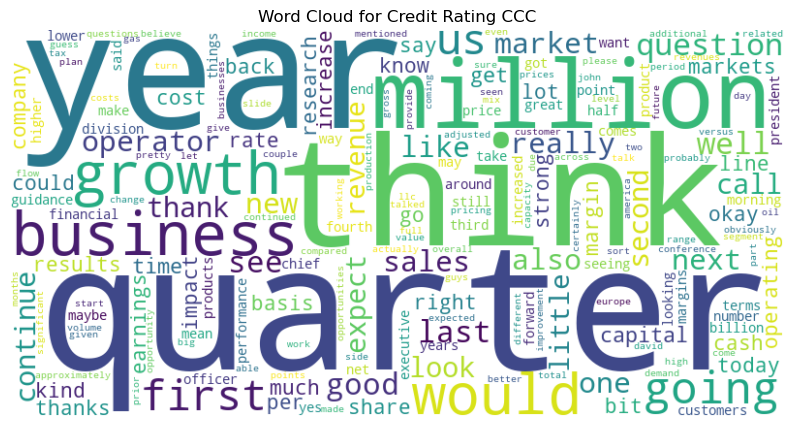

In [27]:
from wordcloud import WordCloud

# Generate word clouds for each credit rating
ratings = ["AA","BBB","CCC"]
for rating in ratings:

    # Filter by rating
    rating_df = df[df['Rating'] == rating]
    # Get words and toss stop words and numbers
    rating_words = df['transcript_words']
    stop_words = set(stopwords.words('english'))
    rating_words = rating_words.apply(lambda t_words: [word.lower() for word in t_words if word.lower() not in stop_words and word.isalpha()])
    
    # Get all words
    all_words = rating_words.explode()

    # Get frequencies
    fdist = FreqDist(all_words)

    # Generate Word Cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(fdist)
    
    # Plot Word Cloud
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for Credit Rating {rating}')
    plt.show()

We can see from word cloud for credit rating AA, postive words like "growth" are larger when compared to credit rating CCC.

## Thank Yous by Rating

In the past we computed the frequency of all bigrams. We don't have memory for that anymore (at least locally - might try to re-engineer or go on SCF later), but we found "Thank you" was a distinguisher between rating classes. So we will still instead investigate presence of the phrase "Thank You" in the data by rating.

In [28]:
# Function to count presence of thank you (all caps) in transcript after it's been capitalized
def ty_count(transcript):
    cap_transcript = transcript.upper()
    return cap_transcript.count('THANK YOU')

# Apply to items in df
df['ty_count'] = df['transcript'].apply(ty_count)

In [29]:
# Means of ty_count by credit rating
ty_means = df.groupby('Rating')['ty_count'].mean().reset_index()
ty_means

C:\Users\ijyli\AppData\Local\Temp\ipykernel_22008\1760052970.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ty_means = df.groupby('Rating')['ty_count'].mean().reset_index()


,Rating,ty_count
0,AAA,15.826087
1,AA,15.258772
2,A,12.724490
3,BBB,12.200443
4,BB,11.505003
5,B,11.660691
6,CCC,10.954545
7,CC,8.500000
8,C,13.062500
9,D,14.000000


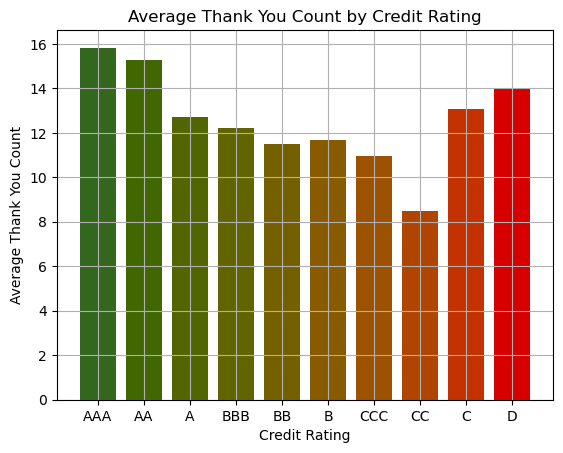

In [30]:
# Plot: Colored with gradient and ordered

# Colors AAA through D
# Used https://colordesigner.io/gradient-generator#google_vignette
# Assign hex codes from green to red
#32671d
#416703
#516600
#626400
#756000
#885b00
#9c5200
#af4500
#c33200
#d60000
hex_code_mapper = {'AAA': '#32671d', 'AA': '#416703', 'A': '#516600', 'BBB': '#626400', 'BB': '#756000', 'B': '#885b00', 'CCC': '#9c5200', 'CC': '#af4500', 'C': '#c33200', 'D': '#d60000'}

# Ordering of bars - keys from hex_code_mapper
bar_order = ['AAA', 'AA', 'A', 'BBB', 'BB', 'B', 'CCC', 'CC', 'C', 'D']

# Plot
#plt.figure(figsize=(8, 5))
plt.bar(x='Rating', height='ty_count', data=ty_means, color=[hex_code_mapper[i] for i in bar_order])
plt.title('Average Thank You Count by Credit Rating')
plt.xlabel('Credit Rating')
plt.ylabel('Average Thank You Count')
plt.grid(True)
plt.savefig(output_folder + 'all_data_average_thank_you_count.png')
plt.show()

C:\Users\ijyli\AppData\Local\Temp\ipykernel_22008\4241544096.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ty_share_means = df.groupby('Rating')['ty_share_of_bigrams'].mean().reset_index()
C:\Users\ijyli\AppData\Local\Temp\ipykernel_22008\4241544096.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(['{:.2f}%'.format(x*100) for x in plt.gca().get_yticks()])


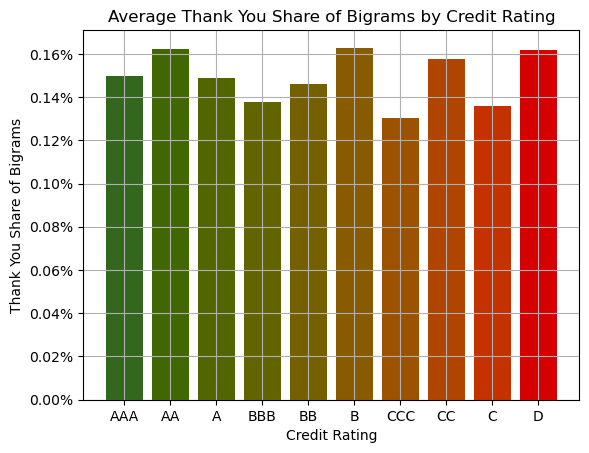

In [31]:
# Compute number of bigrams
df['num_bigrams'] = df['transcript_words'].apply(lambda x: len(x) - 1)

# Thank you count divided by number of bigrams
df['ty_share_of_bigrams'] = df['ty_count'] / df['num_bigrams']

# Average thank you share of bigrams by credit rating
ty_share_means = df.groupby('Rating')['ty_share_of_bigrams'].mean().reset_index()

# Plot
#plt.figure(figsize=(8, 5))
plt.bar(x='Rating', height='ty_share_of_bigrams', data=ty_share_means, color=[hex_code_mapper[i] for i in bar_order])
plt.title('Average Thank You Share of Bigrams by Credit Rating')
plt.xlabel('Credit Rating')
plt.ylabel('Thank You Share of Bigrams')
# y-axis ticks as percentages
plt.gca().set_yticklabels(['{:.2f}%'.format(x*100) for x in plt.gca().get_yticks()])
plt.grid(True)
plt.savefig(output_folder + 'all_data_thank_you_share_of_bigrams.png')
plt.show()

In [32]:
# End timer
end_time = time.time()

# Time in minutes
print(f"Time to run notebook: {(end_time - start_time) / 60:.2f} minutes")

Time to run notebook: 8.62 minutes
